## Quantum Chemistry Simulation for Symmetry-Adapted Quantum Circuits 

Quantum Chemistry Simulation for symmetry-adapted quantum circuits is a cutting-edge approach that leverages symmetries in molecular systems to optimize quantum simulations. These symmetries, present in the molecular Hamiltonians, often go unutilized in standard quantum circuits. However, by constructing quantum circuits that respect these inherent symmetries, the complexity of the simulation can be significantly reduced. This method offers a highly efficient way to simulate larger molecular systems on quantum computers by limiting the quantum operations to symmetry-preserving states.

Symmetry-adapted circuits capitalize on group-theoretical techniques, identifying symmetries such as particle number conservation, spin, and spatial symmetries. For instance, when simulating a molecule with rotational symmetries, incorporating these into the quantum circuit reduces the computational load by constraining the circuit to only explore relevant subspaces of the Hilbert space. In essence, this technique removes unnecessary redundancies, allowing quantum hardware to focus on the most critical parts of the simulation.

The benefits extend beyond mere computational efficiency. By maintaining these symmetries throughout the quantum simulation, accuracy can improve. Traditional circuits may inadvertently break these symmetries, introducing errors that propagate through the computation. In contrast, symmetry-adapted circuits ensure the preservation of physical constraints, leading to more reliable results in electronic structure calculations.

A practical implementation of symmetry-adapted quantum circuits begins with identifying the molecular Hamiltonian symmetries using tools like irreducible representations. These symmetries then guide the construction of quantum circuits, ensuring that the number of qubits and the depth of the circuits are minimized. This methodology finds applications in areas like quantum chemistry and materials science, where simulating complex molecular interactions with high precision is crucial.

As quantum computing advances, symmetry-adapted circuits will play an increasingly prominent role, particularly as quantum hardware scales and more intricate molecules need simulation. The combination of quantum chemistry principles with quantum circuit optimization paves the way for breakthroughs in fields requiring precise simulations of molecular behavior.

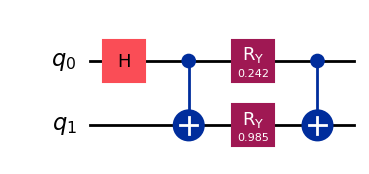

QiskitError: 'No statevector for experiment "None"'

In [6]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit_algorithms import VQE
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import Estimator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_hinton
from qiskit.quantum_info import Statevector, partial_trace
from qiskit_algorithms.optimizers import COBYLA
import matplotlib.pyplot as plt

%matplotlib inline 

# Define the symmetry-adapted Hamiltonian
h_pauli_terms = {
    "II": -1.052373245772859,
    "IZ": 0.39793742484318045,
    "ZI": -0.39793742484318045,
    "ZZ": -0.01128010425623538,
    "XX": 0.18093119978423156,
}

# Create the Hamiltonian as a SparsePauliOp
pauli_op_list = [(pauli_str, coef) for pauli_str, coef in h_pauli_terms.items()]
hamiltonian = SparsePauliOp.from_list(pauli_op_list)

# Define a symmetry-adapted quantum circuit (2-qubit system)
def create_symmetry_adapted_circuit(num_qubits, params):
    qc = QuantumCircuit(num_qubits)
    
    # Symmetry-adapted initial state
    qc.h(0)
    qc.cx(0, 1)

    # Apply parameterized gates
    qc.ry(params[0], 0)
    qc.ry(params[1], 1)

    # Entangling gates
    qc.cx(0, 1)

    return qc

# Define parameters for the circuit
params = np.random.random(2)

# Generate the symmetry-adapted quantum circuit
symmetry_circuit = create_symmetry_adapted_circuit(2, params)

# Visualize the symmetry-adapted quantum circuit
symmetry_circuit.draw('mpl')
plt.show()

# Use VQE to solve the electronic structure problem
estimator = Estimator()
ansatz = EfficientSU2(num_qubits=2, entanglement='linear')

# Define an optimizer with max iterations
optimizer = COBYLA(maxiter=100)

vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=optimizer)

# Run VQE using AerSimulator
simulator = AerSimulator(method='statevector')
symmetry_circuit = transpile(symmetry_circuit, simulator)

# Run the simulation to get the statevector (without measurement)
job = simulator.run(symmetry_circuit)
result = job.result()

# Get the statevector
state = result.get_statevector()
print(state)

# Plot the Bloch multivector
plot_bloch_multivector(state)
plt.show()

# Plot state on the Qsphere
plot_state_qsphere(state)
plt.show()

# Plot state city visualization
plot_state_city(state)
plt.show()

# Perform partial trace and plot density matrix for one qubit
rho = partial_trace(state, [1])
plot_state_hinton(rho)
plt.show()

# Now add measurement and re-run the circuit to get counts
symmetry_circuit.measure_all()

# Re-run the circuit with measurements (note this is a separate run)
measured_job = simulator.run(symmetry_circuit)
measured_result = measured_job.result()

# Get and visualize the counts (histogram)
counts = measured_result.get_counts()
plot_histogram(counts)
plt.show()


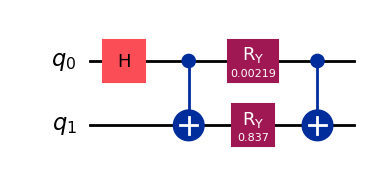

QiskitError: 'No statevector for experiment "None"'

In [7]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit_algorithms import VQE
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import Estimator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_hinton
from qiskit.quantum_info import Statevector, partial_trace
from qiskit_algorithms.optimizers import COBYLA
import matplotlib.pyplot as plt

%matplotlib inline 

# Define the symmetry-adapted Hamiltonian
h_pauli_terms = {
    "II": -1.052373245772859,
    "IZ": 0.39793742484318045,
    "ZI": -0.39793742484318045,
    "ZZ": -0.01128010425623538,
    "XX": 0.18093119978423156,
}

# Create the Hamiltonian as a SparsePauliOp
pauli_op_list = [(pauli_str, coef) for pauli_str, coef in h_pauli_terms.items()]
hamiltonian = SparsePauliOp.from_list(pauli_op_list)

# Define a symmetry-adapted quantum circuit (2-qubit system)
def create_symmetry_adapted_circuit(num_qubits, params):
    qc = QuantumCircuit(num_qubits)
    
    # Symmetry-adapted initial state
    qc.h(0)
    qc.cx(0, 1)

    # Apply parameterized gates
    qc.ry(params[0], 0)
    qc.ry(params[1], 1)

    # Entangling gates
    qc.cx(0, 1)

    return qc

# Define parameters for the circuit
params = np.random.random(2)

# Generate the symmetry-adapted quantum circuit
symmetry_circuit = create_symmetry_adapted_circuit(2, params)

# Visualize the symmetry-adapted quantum circuit
symmetry_circuit.draw('mpl')
plt.show()

# VQE for electronic structure problem (without measurement for statevector)
estimator = Estimator()  # Create an estimator object
ansatz = EfficientSU2(num_qubits=2, entanglement='linear')  # Define the ansatz circuit

# Define an optimizer with max iterations
optimizer = COBYLA(maxiter=100)

vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=optimizer)

# Run VQE using AerSimulator (set method to 'statevector' for state retrieval)
simulator = AerSimulator(method='statevector')  # Set the simulator method to 'statevector'
symmetry_circuit = transpile(symmetry_circuit, simulator)  # Transpile for the simulator

# Run the simulation to get the statevector
job = simulator.run(symmetry_circuit)
result = job.result()

# Get the statevector
state = result.get_statevector()
print(state)

# Plot visualizations using the statevector (before measurement)
plot_bloch_multivector(state)
plt.show()
plot_state_qsphere(state)
plt.show()
plot_state_city(state)
plt.show()

# Partial trace for one qubit's density matrix
rho = partial_trace(state, [1])
plot_state_hinton(rho)
plt.show()

# Separate run for circuit with measurement (measurement collapses statevector)
# Create a new circuit for measurement (avoid modifying the original circuit)
measured_circuit = create_symmetry_adapted_circuit(2, params)
measured_circuit.measure_all()  # Add measurement to all

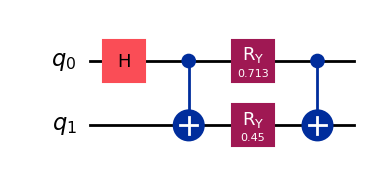

QiskitError: 'No statevector for experiment "None"'

In [8]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit_algorithms import VQE
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import Estimator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_hinton
from qiskit.quantum_info import Statevector, partial_trace
from qiskit_algorithms.optimizers import COBYLA
import matplotlib.pyplot as plt

%matplotlib inline 

# Define the symmetry-adapted Hamiltonian
h_pauli_terms = {
    "II": -1.052373245772859,
    "IZ": 0.39793742484318045,
    "ZI": -0.39793742484318045,
    "ZZ": -0.01128010425623538,
    "XX": 0.18093119978423156,
}

# Create the Hamiltonian as a SparsePauliOp
pauli_op_list = [(pauli_str, coef) for pauli_str, coef in h_pauli_terms.items()]
hamiltonian = SparsePauliOp.from_list(pauli_op_list)

# Define a symmetry-adapted quantum circuit (2-qubit system)
def create_symmetry_adapted_circuit(num_qubits, params):
    qc = QuantumCircuit(num_qubits)
    
    # Symmetry-adapted initial state
    qc.h(0)
    qc.cx(0, 1)

    # Apply parameterized gates
    qc.ry(params[0], 0)
    qc.ry(params[1], 1)

    # Entangling gates
    qc.cx(0, 1)

    return qc

# Define parameters for the circuit
params = np.random.random(2)

# Generate the symmetry-adapted quantum circuit
symmetry_circuit = create_symmetry_adapted_circuit(2, params)

# Visualize the symmetry-adapted quantum circuit
symmetry_circuit.draw('mpl')
plt.show()

# VQE for electronic structure problem (without measurement for statevector)
estimator = Estimator()  # Create an estimator object
ansatz = EfficientSU2(num_qubits=2, entanglement='linear')  # Define the ansatz circuit

# Define an optimizer with max iterations
optimizer = COBYLA(maxiter=100)

vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=optimizer)

# Run VQE using AerSimulator (set method to 'statevector' for state retrieval)
simulator = AerSimulator(method='statevector')  # Set the simulator method to 'statevector'
symmetry_circuit = transpile(symmetry_circuit, simulator)  # Transpile for the simulator

# Run the simulation to get the statevector
job = simulator.run(symmetry_circuit)
result = job.result()

# Get the statevector
state = result.get_statevector()
print(state)

# Plot visualizations using the statevector (before measurement)
plot_bloch_multivector(state)
plt.show()
plot_state_qsphere(state)
plt.show()
plot_state_city(state)
plt.show()

# Partial trace for one qubit's density matrix
rho = partial_trace(state, [1])
plot_state_hinton(rho)
plt.show()

# Separate run for circuit with measurement (measurement collapses statevector)
# Create a new circuit for measurement (avoid modifying the original circuit)
measured_circuit = create_symmetry_adapted_circuit(2, params)
measured_circuit.measure_all()  # Add measurement to all

# Run the circuit with measurements (note this is a separate run)
measured_job = simulator.run(measured_circuit)
measured_result = measured_job.result()

# Get and visualize the counts (histogram)
counts = measured_result.get_counts()
plot_histogram(counts)
plt.show()